# Julia 機器學習：GLM 線性迴歸

## 作業 027：波士頓房價預測資料集

請使用 GLM 中的模型，建立一個預測模型來預測波士頓的房價。

In [1]:
using Toolkits
@activate DSML
using GLM, RDatasets, MLDataUtils

 Activating environment at `C:\Users\sciph\.julia\environments\DSML\Project.toml`


## 讀取資料

In [2]:
boston = dataset("MASS", "Boston")
first(boston, 10)

,Crim,Zn,Indus,Chas,NOx,Rm,Age,Dis,Rad,Tax
,Float64,Float64,Float64,Int64,Float64,Float64,Float64,Float64,Int64,Int64
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222
6,0.02985,0.0,2.18,0,0.458,6.43,58.7,6.0622,3,222
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311
8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311
9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311


In [3]:
using Statistics
cormatrix = @pip boston Matrix(_) cor

14×14 Array{Float64,2}:
  1.0        -0.200469    0.406583  …  -0.385064    0.455621   -0.388305
 -0.200469    1.0        -0.533828      0.17552    -0.412995    0.360445
  0.406583   -0.533828    1.0          -0.356977    0.6038     -0.483725
 -0.0558916  -0.0426967   0.062938      0.0487885  -0.0539293   0.17526
  0.420972   -0.516604    0.763651     -0.380051    0.590879   -0.427321
 -0.219247    0.311991   -0.391676  …   0.128069   -0.613808    0.69536
  0.352734   -0.569537    0.644779     -0.273534    0.602339   -0.376955
 -0.37967     0.664408   -0.708027      0.291512   -0.496996    0.249929
  0.625505   -0.311948    0.595129     -0.444413    0.488676   -0.381626
  0.582764   -0.314563    0.72076      -0.441808    0.543993   -0.468536
  0.289946   -0.391679    0.383248  …  -0.177383    0.374044   -0.507787
 -0.385064    0.17552    -0.356977      1.0        -0.366087    0.333461
  0.455621   -0.412995    0.6038       -0.366087    1.0        -0.737663
 -0.388305    0.360445   -0.4

In [4]:
for i in 1:14,j in 1:14
    if cormatrix[i,j]^2>0.8
        println("$i,$j")
    
    end
end

1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9
9,10
10,9
10,10
11,11
12,12
13,13
14,14


In [5]:
boston[:,[9,10]]

,Rad,Tax
,Int64,Int64
1,1,296
2,2,242
3,2,242
4,3,222
5,3,222
6,3,222
7,5,311
8,5,311
9,5,311


In [6]:
using StatsPlots

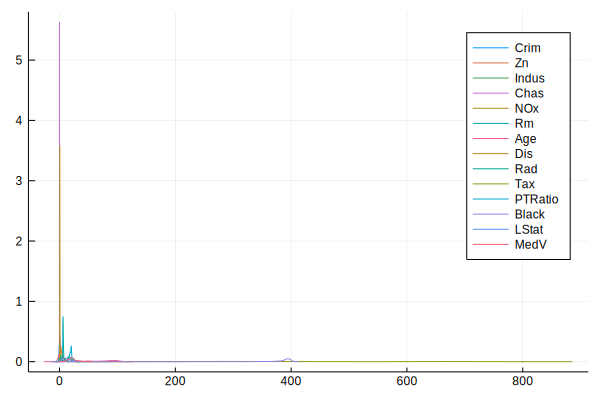

In [7]:
@df boston density(cols(1:14))

In [8]:
p = []
for i in 1:14
    push!(p,begin @df boston histogram(cols(i));title!(String(names(boston)[i]));end)
end

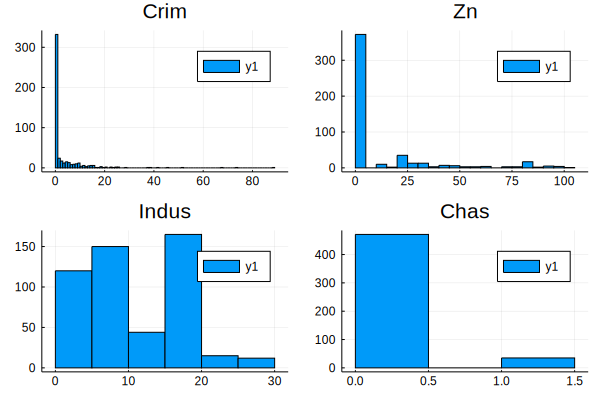

In [9]:
plot(p[1:4]...,layout=(2,2))

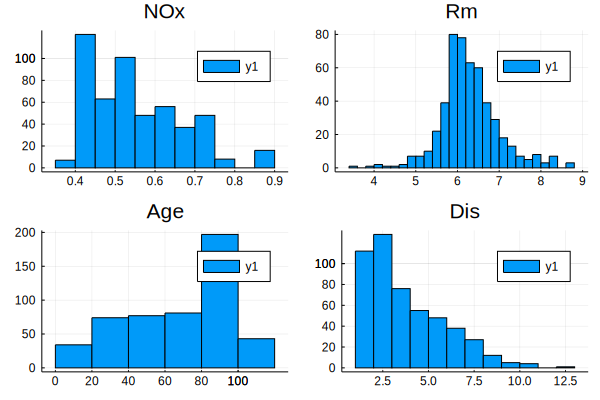

In [10]:
plot(p[5:8]...,layout=(2,2))

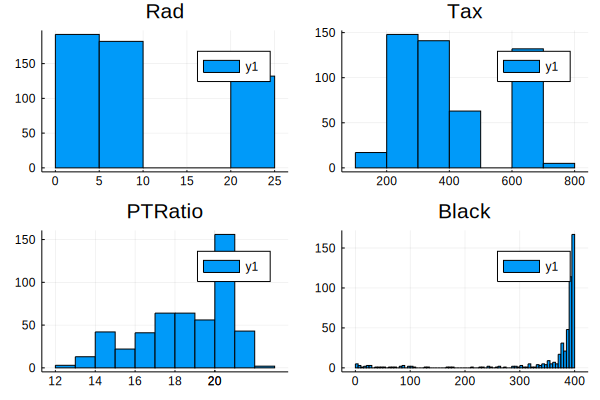

In [11]:
plot(p[9:12]...,layout=(2,2))

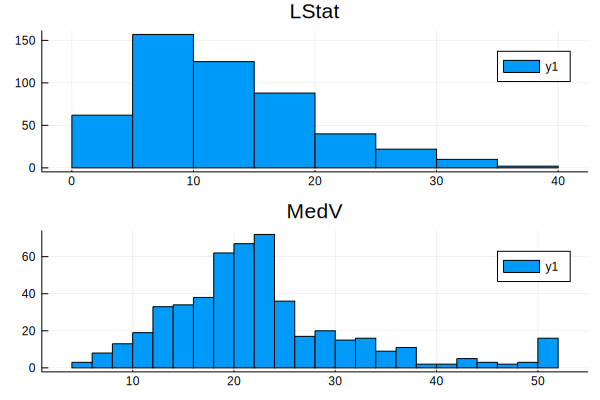

In [12]:
plot(p[13:14]...,layout=(2,1))

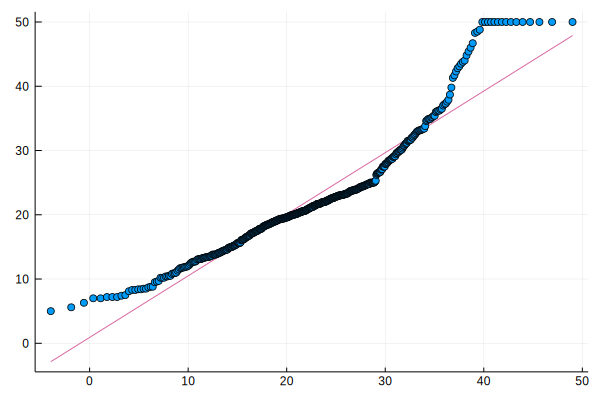

In [13]:
qqnorm(boston[!,14], qqline = :fit)

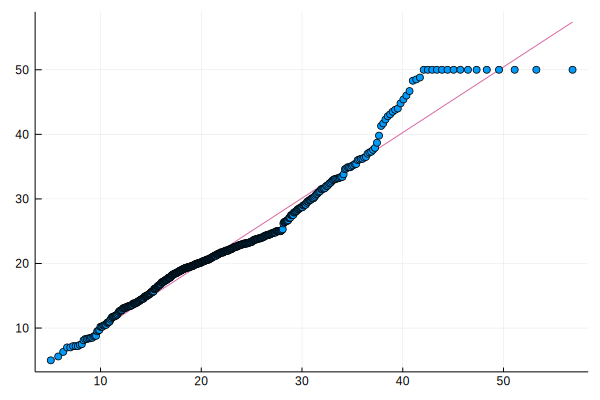

In [14]:
qqplot(Gamma,boston[!,14], qqline = :fit)

In [15]:
indecies = shuffleobs(collect(1:nrow(boston)))
train_ind, test_ind = splitobs(indecies, at = 0.8)
train = boston[train_ind, :]
test = boston[test_ind, :]

,Crim,Zn,Indus,Chas,NOx,Rm,Age,Dis,Rad,Tax
,Float64,Float64,Float64,Int64,Float64,Float64,Float64,Float64,Int64,Int64
1,1.42502,0.0,19.58,0,0.871,6.51,100.0,1.7659,5,403
2,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287
3,0.02543,55.0,3.78,0,0.484,6.696,56.4,5.7321,5,370
4,0.1265,25.0,5.13,0,0.453,6.762,43.4,7.9809,8,284
5,0.19186,0.0,7.38,0,0.493,6.431,14.7,5.4159,5,287
6,1.80028,0.0,19.58,0,0.605,5.877,79.2,2.4259,5,403
7,0.03502,80.0,4.95,0,0.411,6.861,27.9,5.1167,4,245
8,0.05561,70.0,2.24,0,0.4,7.041,10.0,7.8278,5,358
9,0.09266,34.0,6.09,0,0.433,6.495,18.4,5.4917,7,329


In [16]:
mean(train[:,14])

22.178518518518523

In [17]:
mean(test[:,14])

23.953465346534657

In [18]:
names(boston)

14-element Array{Symbol,1}:
 :Crim
 :Zn
 :Indus
 :Chas
 :NOx
 :Rm
 :Age
 :Dis
 :Rad
 :Tax
 :PTRatio
 :Black
 :LStat
 :MedV

In [19]:
model = lm(@formula(MedV~Crim+Zn+Indus+Chas+NOx+Rm+Age+Dis+Rad+Tax+PTRatio+Black+LStat),train)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

MedV ~ 1 + Crim + Zn + Indus + Chas + NOx + Rm + Age + Dis + Rad + Tax + PTRatio + Black + LStat

Coefficients:
──────────────────────────────────────────────────────────────────────────────────────
                 Estimate  Std. Error     t value  Pr(>|t|)     Lower 95%    Upper 95%
──────────────────────────────────────────────────────────────────────────────────────
(Intercept)   34.0162      5.69296      5.97513      <1e-8    22.8236      45.2088
Crim          -0.101914    0.0331574   -3.07365      0.0023   -0.167103    -0.0367251
Zn             0.0509683   0.0159522    3.19506      0.0015    0.0196054    0.0823311
Indus         -0.00388237  0.0659655   -0.0588546    0.9531   -0.133574     0.125809
Chas           3.24065     0.901428     3.59502      0.0004    1.4684       5.01291
NOx          -16.6866      4.1724

In [20]:
deviance(model)

8635.814850033017

In [21]:
mse(y,ŷ)=sum((y.-ŷ).^2)/length(y)

mse (generic function with 1 method)

In [22]:
mse(train[:,14],predict(model,train))

21.322999629711152

In [23]:
mse(test[:,14],predict(model,test))

24.75735639321985

In [24]:
model = glm(@formula(MedV~Crim+Zn+Indus+Chas+NOx+Rm+Age+Dis+Rad+Tax+PTRatio+Black+LStat),train,Gamma(),InverseLink())

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Array{Float64,1},Gamma{Float64},InverseLink},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

MedV ~ 1 + Crim + Zn + Indus + Chas + NOx + Rm + Age + Dis + Rad + Tax + PTRatio + Black + LStat

Coefficients:
───────────────────────────────────────────────────────────────────────────────────────
                 Estimate   Std. Error    z value  Pr(>|z|)     Lower 95%     Upper 95%
───────────────────────────────────────────────────────────────────────────────────────
(Intercept)   0.0155591    0.0106813     1.45667     0.1452  -0.00537588    0.0364941
Crim          0.000866364  0.000137422   6.30441     <1e-9    0.000597022   0.00113571
Zn           -2.28492e-5   2.31316e-5   -0.98779     0.3233  -6.81863e-5    2.2488e-5
Indus        -7.1196e-5    0.000117397  -0.606454    0.5442  -0.00030129    0.000158898
Chas         -0.00318276   0.00129364   -2.46032     0.0139  -0.0057

In [25]:
deviance(model)

13.793326089324843

In [26]:
mse(train[:,14],predict(model,train))

15.762015638403343

In [27]:
mse(test[:,14],predict(model,test))

18.48429104865694

In [28]:
model = glm(@formula(MedV~Crim+Chas+NOx+Rm+Dis+Rad+Tax+PTRatio+Black+LStat),train,Gamma(),InverseLink())

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Array{Float64,1},Gamma{Float64},InverseLink},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

MedV ~ 1 + Crim + Chas + NOx + Rm + Dis + Rad + Tax + PTRatio + Black + LStat

Coefficients:
──────────────────────────────────────────────────────────────────────────────────────
                 Estimate   Std. Error   z value  Pr(>|z|)     Lower 95%     Upper 95%
──────────────────────────────────────────────────────────────────────────────────────
(Intercept)   0.0159466    0.0104396     1.52751    0.1266  -0.00451465    0.0364078
Crim          0.000854262  0.000136274   6.26871    <1e-9    0.00058717    0.00112135
Chas         -0.00346223   0.00125008   -2.7696     0.0056  -0.00591234   -0.00101211
NOx           0.0209728    0.00795654    2.63592    0.0084   0.0053783     0.0365674
Rm           -0.00333184   0.000727723  -4.57844    <1e-5   -0.00475815   -0.00190553
Dis      

In [29]:
deviance(model)

13.860303974955333

In [30]:
mse(train[:,14],predict(model,train))

15.905913631397402

In [31]:
mse(test[:,14],predict(model,test))

18.499275715677896

In [32]:
model = glm(@formula(MedV~Crim+Chas+NOx+Rm+Dis+Rad+PTRatio+Black+LStat),train,Gamma(),InverseLink())

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Array{Float64,1},Gamma{Float64},InverseLink},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

MedV ~ 1 + Crim + Chas + NOx + Rm + Dis + Rad + PTRatio + Black + LStat

Coefficients:
─────────────────────────────────────────────────────────────────────────────────────
                 Estimate   Std. Error   z value  Pr(>|z|)    Lower 95%     Upper 95%
─────────────────────────────────────────────────────────────────────────────────────
(Intercept)   0.0203811    0.0104447     1.95133    0.0510  -9.02136e-5   0.0408524
Crim          0.000869787  0.000138419   6.28371    <1e-9    0.00059849   0.00114108
Chas         -0.00332353   0.00127109   -2.6147     0.0089  -0.00581482  -0.000832234
NOx           0.0271237    0.00787422    3.44462    0.0006   0.0116905    0.0425569
Rm           -0.00373869   0.000727771  -5.13718    <1e-6   -0.0051651   -0.00231229
Dis           0.001680

In [33]:
deviance(model)

14.310157158242863

In [34]:
mse(train[:,14],predict(model,train))

16.400544123690388

In [35]:
mse(test[:,14],predict(model,test))

16.78797606098481